## Pandapower

Most extensive Python pacakge formulation of electrical power systems. `pandapipes` also models heat and gas energy flows. Can implement any electrical grid topologies. Can group nodes to represent microgrids. Can model busses that interact with an "external grid" for slack electricity.

Convert from pandapower to [PostgreSQL](https://pandapower.readthedocs.io/en/stable/file_io.html) with its built-in functions.


In [5]:
import pandapower as pp
import pandapower.networks
import pandapower.topology
import pandapower.plotting
import pandapower.converter
import pandapower.estimation
import pandapower.test
pandapower.test.run_all_tests()

============================= test session starts ==============================
platform darwin -- Python 3.12.4, pytest-8.3.1, pluggy-1.5.0
rootdir: /opt/miniconda3/envs/ppower/lib/python3.12/site-packages/pandapower/test
collected 1046 items

../../../../../../../opt/miniconda3/envs/ppower/lib/python3.12/site-packages/pandapower/test/api/test_auxiliary.py ..F

=================================== FAILURES ===================================
______________________________ test_memory_leaks _______________________________

    def test_memory_leaks():
        net = pp.networks.example_simple()
    
        # first, test to check that there are no memory leaks
        types_dict1 = pp.get_gc_objects_dict()
        num = 3
        for _ in range(num):
            net_copy = copy.deepcopy(net)
            # In each net copy it has only one controller
            pp.control.ContinuousTapControl(net_copy, tid=0, vm_set_pu=1)
    
        gc.collect()
    
        types_dict2 = pp.get_gc_obj

In [9]:

net = pp.create_empty_network()

pp.create_bus(net, name = "110 kV bar", vn_kv = 110, type = 'b')
pp.create_bus(net, name = "20 kV bar", vn_kv = 20, type = 'b')
pp.create_bus(net, name = "bus 2", vn_kv = 20, type = 'b')
pp.create_bus(net, name = "bus 3", vn_kv = 20, type = 'b')
pp.create_bus(net, name = "bus 4", vn_kv = 20, type = 'b')
pp.create_bus(net, name = "bus 5", vn_kv = 20, type = 'b')
pp.create_bus(net, name = "bus 6", vn_kv = 20, type = 'b')

pp.create_ext_grid(net, 0, vm_pu = 1)

pp.create_line(net, name = "line 0", from_bus = 1, to_bus = 2, length_km = 1, std_type = "NAYY 4x150 SE")
pp.create_line(net, name = "line 1", from_bus = 2, to_bus = 3, length_km = 1, std_type = "NAYY 4x150 SE")
pp.create_line(net, name = "line 2", from_bus = 3, to_bus = 4, length_km = 1, std_type = "NAYY 4x150 SE")
pp.create_line(net, name = "line 3", from_bus = 4, to_bus = 5, length_km = 1, std_type = "NAYY 4x150 SE")
pp.create_line(net, name = "line 4", from_bus = 5, to_bus = 6, length_km = 1, std_type = "NAYY 4x150 SE")
pp.create_line(net, name = "line 5", from_bus = 6, to_bus = 1, length_km = 1, std_type = "NAYY 4x150 SE")

pp.create_transformer_from_parameters(net, hv_bus=0, lv_bus=1, i0_percent=0.038, pfe_kw=11.6,
        vkr_percent=0.322, sn_mva=40, vn_lv_kv=22.0, vn_hv_kv=110.0, vk_percent=17.8)

pp.create_load(net, 2, p_mw = 1, q_mvar = 0.2, name = "load 0")
pp.create_load(net, 3, p_mw = 1, q_mvar = 0.2, name = "load 1")
pp.create_load(net, 4, p_mw = 1, q_mvar = 0.2, name = "load 2")
pp.create_load(net, 5, p_mw = 1, q_mvar = 0.2, name = "load 3")
pp.create_load(net, 6, p_mw = 1, q_mvar = 0.2, name = "load 4")

pp.create_switch(net, bus = 1, element = 0, et = 'l')
pp.create_switch(net, bus = 2, element = 0, et = 'l')
pp.create_switch(net, bus = 2, element = 1, et = 'l')
pp.create_switch(net, bus = 3, element = 1, et = 'l')
pp.create_switch(net, bus = 3, element = 2, et = 'l')
pp.create_switch(net, bus = 4, element = 2, et = 'l')
pp.create_switch(net, bus = 4, element = 3, et = 'l', closed = False)
pp.create_switch(net, bus = 5, element = 3, et = 'l')
pp.create_switch(net, bus = 5, element = 4, et = 'l')
pp.create_switch(net, bus = 6, element = 4, et = 'l')
pp.create_switch(net, bus = 6, element = 5, et = 'l')
pp.create_switch(net, bus = 1, element = 5, et = 'l')

pp.runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


MultiGraph with 7 nodes and 6 edges


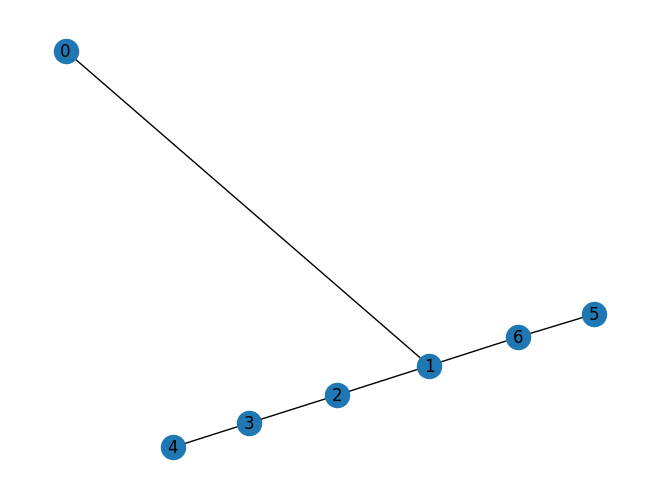

In [15]:
import pandapower.topology as top
import networkx as nx
import matplotlib.pyplot as plt
mg = top.create_nxgraph(net)
nx.draw(mg, with_labels=True)
print(mg)

In [ ]:
import numpy as np
import plotly
import pandapower.networks

netv = pandapower.networks.example_multivoltage()

from pandapower.plotting.plotly import simple_plotly, pf_res_plotly, vlevel_plotly

simple_plotly(net)